In [0]:
import pandas as pd

In [0]:
df = pd.read_csv("dados_sobre_casas.csv")

In [0]:
df.head()

,salario_medio_moradores_regiao,idade_media_casas_regiao,quantidade_media_comodos_regiao,quantidade_media_quartos_regiao,populacao_regiao,valor_casa
0,79545,5,7,4,23086,1059034
1,79248,6,6,3,40173,1505891
2,61287,5,8,5,36882,1058988
3,63345,7,5,3,34310,1260617
4,59982,5,7,4,26354,630943


<Axes: ylabel='Frequency'>

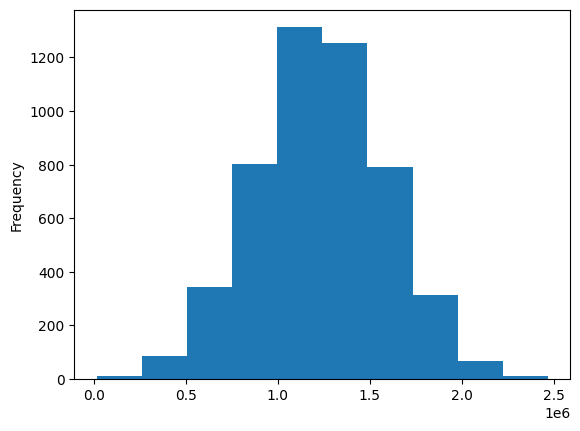

In [0]:
# Cria um gráfico de histograma para a coluna "valor_casa" para ver a distribuição dos preços
df["valor_casa"].plot(kind="hist")

In [0]:
# Gera estatísticas descritivas da coluna "valor_casa" (média, mínimo, máximo, desvio padrão, quartis)
# .astype(str) é usado aqui apenas para facilitar a leitura da formatação
df.valor_casa.describe().astype(str)

,valor_casa
count,5000.0
mean,1232072.6578
std,353117.62499479245
min,15939.0
25%,997577.5
50%,1232669.0
75%,1471210.0
max,2469066.0


<Axes: ylabel='Frequency'>

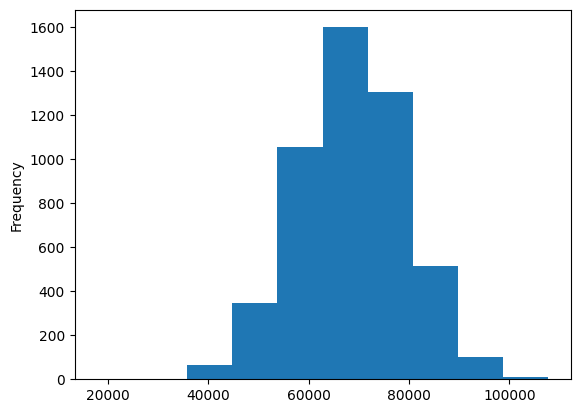

In [0]:
# Cria um histograma para ver a distribuição dos salários médios
df.salario_medio_moradores_regiao.plot(kind="hist")

<Axes: >

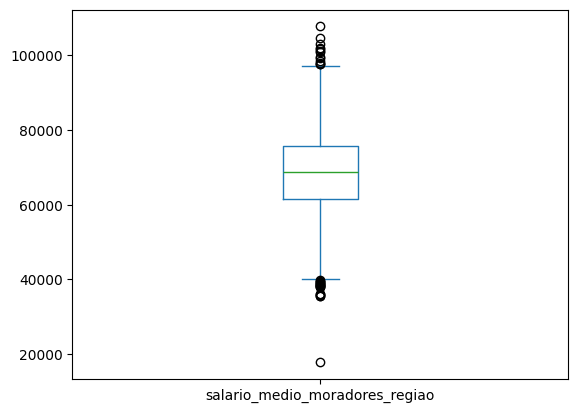

In [0]:
# Cria um gráfico de "Boxplot" (caixa) para o salário. Ajuda a identificar outliers (valores muito fora do padrão)
df.salario_medio_moradores_regiao.plot(kind="box")

In [0]:
df.salario_medio_moradores_regiao.describe().astype(str)

,salario_medio_moradores_regiao
count,5000.0
mean,68582.6144
std,10657.985125881047
min,17796.0
25%,61480.25
50%,68804.0
75%,75783.0
max,107701.0


<Axes: xlabel='salario_medio_moradores_regiao', ylabel='valor_casa'>

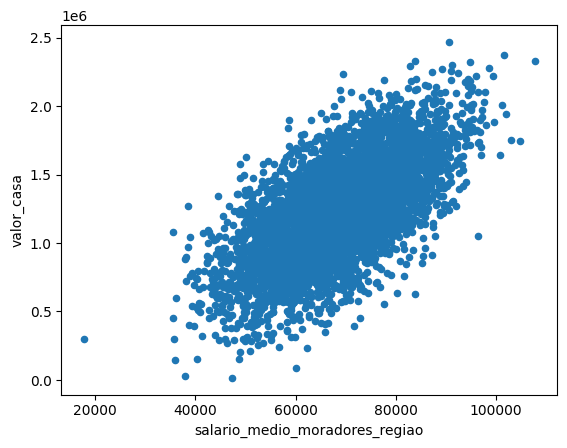

In [0]:
# Cria um gráfico de dispersão (pontos) para ver a relação entre Salário (eixo X) e Valor da Casa (eixo Y)
# Isso ajuda a ver se quando o salário sobe, o valor da casa também sobe
df.plot(kind="scatter", x="salario_medio_moradores_regiao", y="valor_casa")

In [0]:
df.head()

,salario_medio_moradores_regiao,idade_media_casas_regiao,quantidade_media_comodos_regiao,quantidade_media_quartos_regiao,populacao_regiao,valor_casa
0,79545,5,7,4,23086,1059034
1,79248,6,6,3,40173,1505891
2,61287,5,8,5,36882,1058988
3,63345,7,5,3,34310,1260617
4,59982,5,7,4,26354,630943


<Axes: xlabel='salario_medio_moradores_regiao', ylabel='valor_casa'>

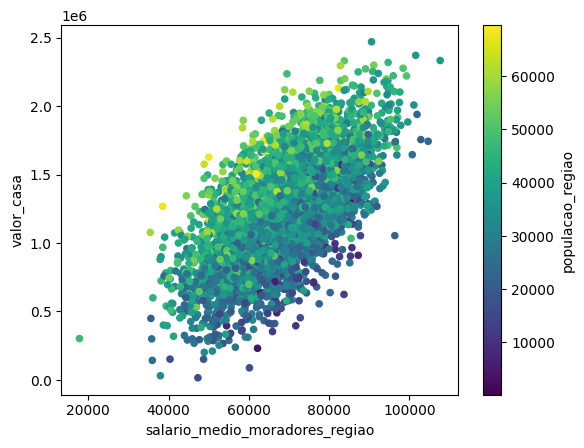

In [0]:
# Cria um gráfico de dispersão similar ao anterior, mas adiciona uma terceira dimensão: cor (c)
# A cor dos pontos muda de acordo com a "populacao_regiao". 'cmap' define a paleta de cores.
df.plot(kind="scatter", x="salario_medio_moradores_regiao", y="valor_casa", c="populacao_regiao", cmap="viridis")

In [0]:
import seaborn as sns

In [0]:
# Calcula a matriz de correlação entre todas as colunas numéricas.
# O valor vai de -1 a 1. Quanto mais próximo de 1, mais forte a relação positiva.
correlacao = df.corr()

<Axes: >

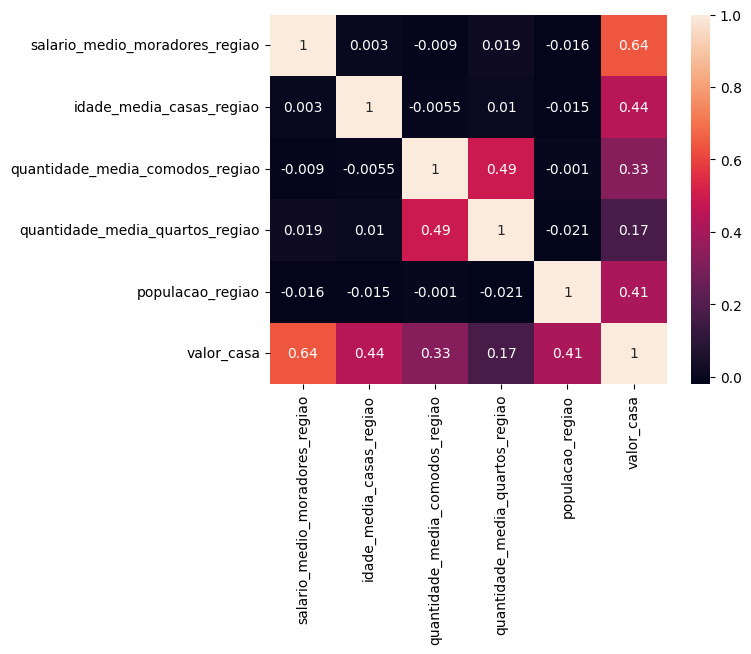

In [0]:
# Cria um Mapa de Calor (Heatmap) visual da matriz de correlação.
# annot=True escreve os números dentro dos quadradinhos.
sns.heatmap(correlacao, annot=True)

In [0]:
#entradas, saída
# Define a matriz de características (X): Removemos a coluna que queremos prever ("valor_casa") e ficamos com o resto
X = df.drop(columns=["valor_casa"])

# Define o vetor alvo (y): Apenas a coluna que queremos prever ("valor_casa")
y = df.valor_casa

In [0]:
# Exibe o tamanho do DataFrame original (linhas, colunas) para conferência
df.shape

(5000, 6)

In [0]:
# Importa a função para dividir os dados em treino e teste
from sklearn.model_selection import train_test_split

Divide os dados: <br>
X_train, y_train: Dados que o robô vai estudar.<br>
X_test, y_test: Dados que o robô nunca viu (usados para a prova final).<br>
test_size=0.2: 20% dos dados vão para teste, 80% para treino.<br>
random_state=28: Garante que o sorteio da divisão seja sempre o mesmo (reprodutibilidade).

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=28)

In [0]:
# Importa o algoritmo de Regressão Linear
from sklearn.linear_model import LinearRegression

In [0]:
# Cria uma instância do modelo (o "robô" vazio)
regression_model_1 = LinearRegression()

# Treina o modelo (.fit) usando os dados de treino.
# Aqui ele aprende a fórmula matemática que liga X a y.
regression_model_1.fit(X_train, y_train)

LinearRegression()

In [0]:
# Exibe o "intercepto" (o valor de b na equação y = ax + b), onde a linha cruza o eixo Y
regression_model_1.intercept_

np.float64(-2359181.043128481)

In [0]:
# Exibe os "coeficientes" (os valores de 'a' para cada coluna).
# Mostra o peso/importância de cada característica (salário, idade da casa, etc) no preço final.
regression_model_1.coef_

array([2.15626290e+01, 1.50590200e+05, 1.10584886e+05, 1.64449809e+03,
       1.51725318e+01])

In [0]:
# Mostra a primeira linha dos dados de treino apenas para pegar um exemplo de valores reais
X_train.head(1)

,salario_medio_moradores_regiao,idade_media_casas_regiao,quantidade_media_comodos_regiao,quantidade_media_quartos_regiao,populacao_regiao
4227,66547,5,6,4,27850


In [0]:
# Define valores manuais para simular uma casa
salario = 66547
idade = 5
comodos = 6
quartos = 4
populacao = 27850

# Cria uma lista com esses valores
teste = [salario, idade, comodos, quartos, populacao]

# Pede para o modelo prever o preço dessa casa inventada
regression_model_1.predict([teste])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([935115.02823646])

In [0]:
# Mostra o valor real da casa que usamos de exemplo no treino (para comparar "de olho")
y_train.head(1)

,valor_casa
4227,1094880


In [0]:
# Calcula a diferença simples entre o valor real e o valor que o modelo previu (erro manual)
1094880 - 935115

159765

In [0]:
# Importa o algoritmo Random Forest Regressor (mais robusto que a regressão linear)
from sklearn.ensemble import RandomForestRegressor

In [0]:
# Cria a instância do modelo 2
regression_modelo_2 = RandomForestRegressor()

# Treina o modelo 2 com os mesmos dados de treino
regression_modelo_2.fit(X_train, y_train)

# Faz uma previsão com aquele mesmo exemplo manual de casa
regression_modelo_2.predict([teste])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([1058098.77])

In [0]:
# Calcula a diferença entre o valor real e a previsão deste segundo modelo
1094880 - 1058098

36782

# Métricas de validação para regressões

* **r2**

Representa o percentual da variância dos dados que é explicado pelo modelo.
Quanto maior o valor, mais explicativo é o modelo.
Varia entre 0 e 1 ou 0% e 100%.

* **MAE: Erro Médio Absoluto**

Calcula a média da diferença entre o valor real com o predito.
Mas por haver valores positivos e negativos, é adicionado um módulo entre a diferença dos valores.
Além disso, esta métrica não é afetada por valores discrepantes.
O valor de saída da equação tem a mesma escala dos dados utilizados para previsão, logo fica mais fácil a sua interpretação


* **MSE: erro quadrático médio**

Calcula a média da diferença entre o valor real com o predito, como a métrica MAE.
Entretanto, ao invés de usar o módulo do resultado entre o valor de y e ŷ, nesta métrica a diferença é elevada ao quadrado.
Desta maneira penalizando valores que sejam muito diferentes entre o previsto e o real.
Portanto, quanto maior é o valor de MSE, significa que o modelo não performou bem em relação as previsões.

* **MAPE: erro percentual absoluto médio**

É uma métrica que mostra a porcentagem de erro em relação aos valores reais.
Tem a mesma base do MAE, porém para chegar na porcentagem, existe uma divisão
usando os valores reais.
Então se o resultado de MAPE for igual a 40% significa que o nosso modelo faz previsões,
que em média a diferença entre o valor previsto e o real equivale a 40% do valor real,
tanto para mais quanto para menos.

In [0]:
# Importa as métricas de avaliação
# r2_score: Acurácia (quanto o modelo explica os dados)
# mean_absolute_error (MAE): Erro médio absoluto
# mean_squared_error (MSE): Erro quadrático médio
# mean_absolute_percentage_error (MAPE): Erro percentual
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

In [0]:
# Faz previsões para TODA a base de teste (20% dos dados) usando o Modelo 1 (Linear)
predicoes_m1 = regression_model_1.predict(X_test)

# Faz previsões para TODA a base de teste usando o Modelo 2 (Random Forest)
predicoes_m2 = regression_modelo_2.predict(X_test)

In [0]:
# Imprime o R² (Acurácia) dos dois modelos.
# Quanto mais próximo de 1.0, melhor.
print(r2_score(y_test, predicoes_m1))

print(r2_score(y_test, predicoes_m2))

0.8892448945202103
0.8422017896529931


In [0]:
# Imprime o MAE (Erro Médio em R$).
# Quanto menor, melhor. (Ex: errou em média 93 mil reais)
print(mean_absolute_error(y_test, predicoes_m1))

print(mean_absolute_error(y_test, predicoes_m2))

93564.18067602196
109293.33478


In [0]:
# Imprime o MSE (Erro ao quadrado). Usado para penalizar erros grandes.
print(mean_squared_error(y_test, predicoes_m1))

print(mean_squared_error(y_test, predicoes_m2))

13626473635.029047
19414302786.61624


In [0]:
# Imprime o MAPE (Erro em porcentagem).
# Ex: 0.08 significa 8% de erro médio.
print(mean_absolute_percentage_error(y_test, predicoes_m1))

print(mean_absolute_percentage_error(y_test, predicoes_m2))

0.08575122090340062
0.10129314712299739


In [0]:
# Configura o pandas para mostrar números float com 3 casas decimais (para não ficar notação científica)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Cria um novo DataFrame juntando:
# 1. O valor Real (y_test)
# 2. A previsão do Modelo Linear
# 3. A previsão do Modelo Random Forest
# Isso permite comparar linha a linha qual modelo chegou mais perto do valor real.
pd.DataFrame(zip(y_test, predicoes_m1, predicoes_m2), columns=["real", "regressao_linear", "regressao_rf"])

,real,regressao_linear,regressao_rf
0,1339096,1377027.046,1359853.540
1,1251794,1118601.762,1150190.620
2,1340095,1181679.395,1211700.570
3,1431508,1204380.080,1181457.370
4,1042374,1115164.798,1132754.870
...,...,...,...
995,1107031,1008174.490,1084996.190
996,1405505,1302556.956,1316380.140
997,1924156,1927820.159,1979062.180
998,1571254,1709258.789,1771383.600
